## Introduction to Engineering Optimization

[Optimization Introduction](https://apmonitor.com/me575/index.php/Main/PythonOptimization) in the [Engineering Optimization](http://apmonitor.com/me575) online course.

Engineering optimization platforms in Python are an important tool for engineers in the modern world. They allow engineers to quickly and easily optimize complex engineering problems and tasks, such as design optimization, resource allocation, and route planning. This notebook has examples for solving LP, QP, NLP, MILP, and MINLP problems in Python.

* 1️⃣ Linear Programming (LP)
* 2️⃣ Quadratic Programming (QP)
* 3️⃣ Nonlinear Programming (NLP)
* 4️⃣ Mixed Integer Linear Programming (MILP)
* 5️⃣ Mixed Integer Nonlinear Programming (MINLP)

<img align=left width=500px src='https://apmonitor.com/me575/uploads/Main/optimize_with_python.png'>

### Install `gekko` Library

First, install the necessary `gekko` library for this notebook. The solutions to the examples are with `scipy` and `gekko`. Installing packages only needs to occur once and then it is always available in that Python distribution. Jupyter notebook may require a restart of the kernel to make the library accessible for import.

In [ ]:
pip install gekko

### 1️⃣ Linear Programming

A company manufactures two products (`G` and `H`) and has two resources (`X` and `Y`) available.

* Each unit of product `G` requires 3 units of resource `X` and 8 units of resource `Y`
* Each unit of product `H` requires 6 units of resource `X` and 4 units of resource `Y`
* The company has a maximum of 30 units of resource `X` and 44 units of resource `Y` available.
* The company wants to maximize profits:
 * \\$100 per unit of product `G`
 * \\$125 per unit of product `H`

Linear programming is an optimization method for solving systems of linear constraints and objectives. This problem is mathematically expressed as:

Maximize $100 G + 125 H$

Subject to:

$3 G + 6 H <= 30$

$8 G + 4 H <= 44$

$G,H >= 0$

where $G$ and $H$ are the number of units of products to be produced, respectively.

#### Scipy Linear Programming

The following code shows how to use linear programming to solve this problem in `scipy.optimize` with the `linprog` function. The linear programming problem is placed into the following matrix form:

$\begin{align}\mathrm{minimize} \quad & c\,x \\ \mathrm{subject\;to}\quad & A \, x=b \\ & A_{ub} \, x<b_{ub} \end{align}$

with:

$x = [G,H]$

$c = [-4,-6]$ with negatives to convert maximize to minimize form

$A_{ub} = \begin{bmatrix}2 & 3\\ 1 & 1\end{bmatrix}$ and $b_{ub}=[100,80]$

In [1]:
from scipy.optimize import linprog
c = [-100, -125]
A = [[3, 6], [8, 4]]
b = [30, 44]
bound = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[bound, bound], method='highs')

# print solution
print(f'Optimal solution: G = {res.x[0]:.2f}, H = {res.x[1]:.2f}')
print(f'Maximum profit = $ {-res.fun:.2f}')

Optimal solution: G = 4.00, H = 3.00
Maximum profit = $ 775.00


#### Gekko Linear Programming

The following code shows how to use linear programming to solve this problem in `gekko`. There is additional information on solving [linear programming problems with sparse or dense matrices](https://apmonitor.com/pdc/index.php/Main/LinearProgramming) in `gekko`.

<img align=left width=200px src='https://apmonitor.com/wiki/uploads/Main/gekko.png'>

In [2]:
from gekko import GEKKO
m = GEKKO()
G,H = m.Array(m.Var,2,lb=0)
m.Maximize(100*G+125*H)
m.Equation(3*G+6*H<=30)
m.Equation(8*G+4*H<=44)
m.solve(disp=False)

# print solution
print(f'Optimal solution: G = {G.value[0]:.2f}, H = {H.value[0]:.2f}')
print(f'Maximum profit = $ {-m.options.objfcnval:.2f}')

Optimal solution: G = 4.00, H = 3.00
Maximum profit = $ 775.00


#### ✅ Activity: Solve the Linear Programming (LP) Problem

$\begin{align}\mathrm{maximize} \quad & x+y \\ \mathrm{subject\;to}\quad & 6x+4y\le24 \\ & x+2y\le6 \\ &-x+y\le1 \\ & 0\le y\le2 \\ & x\ge0 \end{align}$

Use either `gekko` or `scipy` to solve the LP and report the results for `x`, `y`, and the objective function value.

Find the solution on the contour plot to graphically verify the results.

<img align=left width=500px src='https://apmonitor.com/me575/uploads/Main/lp_example.png'>

#### LP Solution Help

In [3]:
# solve LP
m = GEKKO(remote=False)
x,y = m.Array(m.Var,2,lb=0)
m.Equations([6*x+4*y<=24,x+2*y<=6,-x+y<=1,y<=2])
m.Maximize(x+y)
m.solve(disp=False)
xopt = x.value[0]; yopt = y.value[0]
print('x:', xopt,'y:', yopt,'obj:',-m.options.objfcnval)

x: 2.9999996381 y: 1.5000001261 obj: 4.4999997642


#### Visualize Solution (Optional)

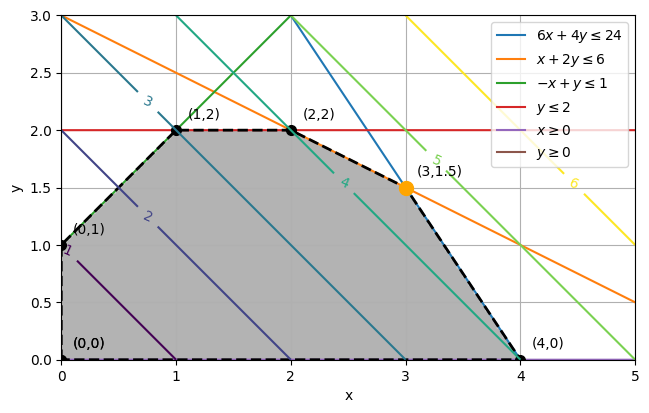

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# visualize solution
g = np.linspace(0,5,200)
x,y = np.meshgrid(g,g)
obj = x+y
plt.imshow(((6*x+4*y<=24)&(x+2*y<=6)&(-x+y<=1)&(y<=2)&(x>=0)&(y>=0)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
# plot constraints
x0 = np.linspace(0, 5, 2000)
y0 = 6-1.5*x0   # 6*x+4*y<=24
y1 = 3-0.5*x0   # x+2*y<=6
y2 = 1+x0       # -x+y<=1
y3 = (x0*0) + 2 # y <= 2
y4 = x0*0       # x >= 0
plt.plot(x0, y0, label=r'$6x+4y\leq24$')
plt.plot(x0, y1, label=r'$x+2y\leq6$')
plt.plot(x0, y2, label=r'$-x+y\leq1$')
plt.plot(x0, 2*np.ones_like(x0), label=r'$y\leq2$')
plt.plot(x0, y4, label=r'$x\geq0$')
plt.plot([0,0],[0,3], label=r'$y\geq0$')
xv = [0,0,1,2,3,4,0]; yv = [0,1,2,2,1.5,0,0]
plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
# objective contours
CS = plt.contour(x,y,obj,np.arange(1,7))
plt.clabel(CS, inline=1, fontsize=10)
# optimal point
plt.plot([xopt],[yopt],marker='o',color='orange',markersize=10)
plt.xlim(0,5); plt.ylim(0,3); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x'); plt.ylabel('y')
plt.show()

### 2️⃣ Quadratic Programming

A car manufacturer wants to minimize the weight of a car while maintaining a minimum strength requirement. The weight of the car is modeled as a quadratic function of the thickness of the car frame components. The strength of the car is modeled as a linear function of the thickness of the car frame components. The manufacturer wants to minimize the weight of the car while maintaining a minimum strength requirement. This problem is formulated as:

Minimize $\frac{1}{2} x^T Q x + p x$

Subject to:

$G \, x >= h$

where `x` is the thickness of the car frame components, `Q` is the quadratic weight coefficient matrix, `p` is the linear weight coefficient vector, `G` is the strength coefficient matrix, and `h` is the strength constraint vector.

In [5]:
# Problem data
# Quadratic weight coefficients
Q = np.array([[1, 0], [0, 2]])
# Linear weight coefficients
p = np.array([1, 2])
# Strength coefficients
G = np.array([[1, 1], [1, 2], [2, 1]])
# Strength constraints
h = np.array([3, 4, 5])
# Initial guess
x0 = np.array([0, 0])

#### Scipy Quadratic Programming

The `minimize` function in the scipy.optimize module is a general-purpose nonlinear optimization routine that can be used to find the minimum of a scalar function of one or more variables. To use it, you need to provide the following inputs:

```python
res = minimize(objective_function, x0,
               constraints=con,bounds=bnds,
               method='SLSQP',options=opt)
```

1. Objective function: This should be a Python function that has decision variables as inputs and returns a scalar value to be minimized.
2. The initial guess for the variables: This should be an array of initial guesses for the variables.
3. Constraints with any inequality and equality bounds in residual format.
4. Bounds: upper and lower bounds on the decision variables.
5. Method: This is an optional parameter that specifies the optimization algorithm.
6. Options: Configure parameters for solving the optimization problem.

In [6]:
from scipy.optimize import minimize

# Define objective function
def objective_function(x):
    return 0.5 * x @ Q @ x + p @ x

# Define constraints
def constraint(x):
    return G @ x - h

# Define optimization
con = {'type': 'ineq', 'fun': constraint}
b = (0,10); bnds = (b,b)
opt = {'maxiter':1000}
res = minimize(objective_function, x0,
               constraints=con,bounds=bnds,
               method='SLSQP',options=opt)

# print results
print(f'Optimal solution: x = {res.x}')
print(f'Minimum weight = {res.fun}')

Optimal solution: x = [2. 1.]
Minimum weight = 7.000000000000006


#### Gekko Quadratic Programming

The following code shows how to use quadratic programming in `gekko`. Change to `remote=False` to solve locally instead of using the public compute server. The public server has additional solver options.

<img align=left width=200px src='https://apmonitor.com/wiki/uploads/Main/gekko.png'>

In [7]:
m = GEKKO(remote=False)
x = m.Array(m.Var,2,lb=0,ub=10)
m.Minimize(0.5 * x@Q@x + p@x)
gx = G@x
m.Equations([gx[i]>=h[i] for i in range(len(h))])
m.solve(disp=False)

# print results
print(f'Optimal solution: x = {x}')
print(f'Minimum weight = {m.options.objfcnval}')

Optimal solution: x = [[2.0000000017] [0.99999999421]]
Minimum weight = 6.999999982


#### ✅ Activity: Solve the Quadratic Programming (QP) Problem

$\begin{align}\mathrm{maximize} \quad & \frac{1}{2} \left(x^2+y^2\right) -2x+2y \\ \mathrm{subject\;to}\quad & 6x+4y\le24 \\ & x+2y\le6 \\ &-x+y\le1 \\ & 0\le y\le2 \\ & x\ge0 \end{align}$

Use either `gekko` or `scipy` to solve the QP and report the results for `x`, `y`, and the objective function value.

#### Visualize QP Objective and Constraints

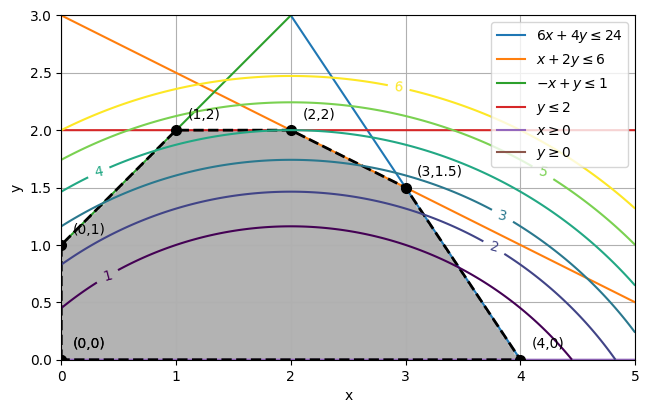

In [8]:
# visualize solution
g = np.linspace(0,5,200)
x,y = np.meshgrid(g,g)
obj = 0.5*(x**2+y**2)-2*x+2*y
plt.imshow(((6*x+4*y<=24)&(x+2*y<=6)&(-x+y<=1)&(y<=2)&(x>=0)&(y>=0)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
# plot constraints
x0 = np.linspace(0, 5, 2000)
y0 = 6-1.5*x0   # 6*x+4*y<=24
y1 = 3-0.5*x0   # x+2*y<=6
y2 = 1+x0       # -x+y<=1
y3 = (x0*0) + 2 # y <= 2
y4 = x0*0       # x >= 0
plt.plot(x0, y0, label=r'$6x+4y\leq24$')
plt.plot(x0, y1, label=r'$x+2y\leq6$')
plt.plot(x0, y2, label=r'$-x+y\leq1$')
plt.plot(x0, 2*np.ones_like(x0), label=r'$y\leq2$')
plt.plot(x0, y4, label=r'$x\geq0$')
plt.plot([0,0],[0,3], label=r'$y\geq0$')
xv = [0,0,1,2,3,4,0]; yv = [0,1,2,2,1.5,0,0]
plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
# objective contours
CS = plt.contour(x,y,obj,np.arange(1,7))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlim(0,5); plt.ylim(0,3); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x'); plt.ylabel('y')
plt.show()

#### QP Solution Help

In [9]:
# solve QP
m = GEKKO(remote=False)
x,y = m.Array(m.Var,2,lb=0)
m.Equations([6*x+4*y<=24,x+2*y<=6,-x+y<=1,y<=2])
m.Maximize(0.5*(x**2+y**2)-2*x+2*y)
m.solve(disp=False)
xopt = x.value[0]; yopt = y.value[0]
print('x:', xopt,'y:', yopt,'obj:',-m.options.objfcnval)

x: 1.0000002542 y: 1.9999999775 obj: 4.4999996557


### 3️⃣ Nonlinear Programming

A nonlinear optimization problem is the Hock Schittkowski problem 71.

$\min x_0 x_3 \left(x_0 + x_1 + x_2\right) + x_2$

$\mathrm{s.t.} \quad x_0 x_1 x_2 x_3 \ge 25$

$x_0^2 + x_1^2 + x_2^2 + x_3^2 = 40$

$1\le x \le 5$

$x_{init} = (1,5,5,1)$

This problem has a nonlinear objective that must be minimized. The variable values at the optimal solution are subject to (s.t.) both equality (`=40`) and inequality (`>=25`) constraints. The product of the four variables must be greater than `25` while the sum of squares of the variables must also equal `40`. In addition, all variables are constrained between `1` and `5` and the initial guess is $x_0=1$, $x_1=5$, $x_2=5$, and $x_3=1$.

#### Scipy Nonlinear Programming

In [10]:
from scipy.optimize import minimize

def objective(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_eq = 40.0
    for i in range(4):
        sum_eq = sum_eq - x[i]**2
    return sum_eq

# initial guesses
x0 = [1,5,5,1]

# optimize
b = (1.0,5.0)
bnds = (b, b, b, b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1,con2])
solution = minimize(objective,x0,method='SLSQP',\
                    bounds=bnds,constraints=cons)
x = solution.x

# print solution
print('Objective: ' + str(objective(x)))
print('Solution:',x)

Objective: 17.01401724563517
Solution: [1.         4.7429961  3.82115462 1.37940765]


#### Gekko Nonlinear Programming

The following code shows how to solve nonlinear programming problems in `gekko`. All solvers in `gekko` can solve `LP`, `QP`, and `NLP` problems.

<img align=left width=200px src='https://apmonitor.com/wiki/uploads/Main/gekko.png'>

In [11]:
from gekko import GEKKO
import numpy as np
m = GEKKO(remote=False)
x = m.Array(m.Var,4,value=1,lb=1,ub=5)
x1,x2,x3,x4 = x
# change initial values
x2.value = 5; x3.value = 5
m.Equation(x1*x2*x3*x4>=25)
m.Equation(x1**2+x2**2+x3**2+x4**2==40)
m.Minimize(x1*x4*(x1+x2+x3)+x3)
m.solve(disp=False)

# print solution
print('Objective: ',m.options.OBJFCNVAL)
print('Solution: ', x)

Objective:  17.014017127
Solution:  [[1.000000057] [4.74299963] [3.8211500283] [1.3794081795]]


#### ✅ Activity: Solve the Nonlinear Programming (NLP) Problem

$\begin{align}\mathrm{minimize} \quad & xy^2-x^2-y^2 \\ \mathrm{subject\;to}\quad & x+y\ge4 \\ & xy<=5 \\ & 1\le x\le3 \\ & 2\le y\le3 \end{align}$

Use either `gekko` or `scipy` to solve the NLP and report the results for `x`, `y`, and the objective function value.

#### Visualize NLP Objective and Constraints

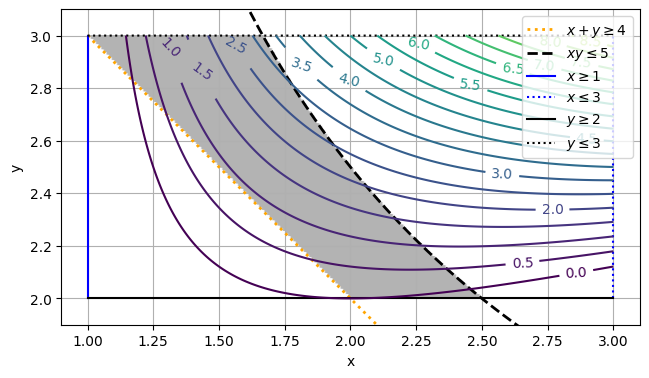

In [12]:
# visualize solution
g = np.linspace(1,3,200)
h = np.linspace(2,3,200)
x,y = np.meshgrid(g,h)
obj = x*y**2-x**2-y**2
plt.imshow(((x+y>=4)&(x*y<=5)&(x>=0)&(y>=0)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
# plot constraints
x0 = np.linspace(1,3,2000)

y0 = 4-x0    # x+y>=4
y1 = 5.0/x0  # x*y<=5

plt.plot(x0,y0,':',color='orange',linewidth=2,label=r'$x+y\geq4$')
plt.plot(x0,y1,'k--',linewidth=2,label=r'$xy\leq5$')

plt.plot([1,1],[2,3],'b-',label=r'$x\geq1$')
plt.plot([3,3],[2,3],'b:',label=r'$x\leq3$')
plt.plot([1,3],[2,2],'k-',label=r'$y\geq2$')
plt.plot(x0, 3*np.ones_like(x0),'k:',label=r'$y\leq3$')
# objective contours
CS = plt.contour(x,y,obj,np.round(np.linspace(0,10,21),1))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlim(0.9,3.1); plt.ylim(1.9,3.1); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x'); plt.ylabel('y')
plt.show()

#### NLP Solution Help

In [13]:
# solve NLP
m = GEKKO(remote=False)
x,y = m.Array(m.Var,2,lb=1,ub=3)
y.LOWER=2
m.Minimize(x*y**2-x**2-y**2)
m.Equations([x+y>=4,x*y<=5])
m.solve(disp=False)
xopt = x.value[0]; yopt = y.value[0]
print('x:', xopt,'y:', yopt,'obj:',m.options.objfcnval)

x: 2.5000000254 y: 2.0 obj: -0.25000002535


### 4️⃣ Mixed Integer Linear Programming

Mixed integer linear programming (MILP) is a type of optimization problem that involves both continuous and discrete (integer) variables. In contrast, regular linear programming (LP) only involves continuous variables. The presence of integer variables in MIP makes the problem more difficult to solve, as the solution space is now discrete rather than continuous. This means that many of the techniques used for solving LP problems are not applicable to MIP. Specialized algorithms and solvers, such as branch-and-bound and branch-and-cut, are typically used to solve MIP problems.

#### Scipy Mixed Integer Linear Programming

Use the `integrality` option in the `linprog` function to specify:

* 0: continuous
* 1: integer

In [14]:
from scipy.optimize import linprog

# Define the objective function
c = [-1, 4] # minimize -x + 4y

# Define the constraints
A_u = np.array([[3, 2], [1, 5]])
b_u = np.array([10,10])

# Define the bounds
b = (0, 10) # 0 <= x <= 10

# Solve
res = linprog(c, A_ub=A_u, b_ub=b_u, bounds=(b,b),
              integrality=[1,1])

# Print the results
print("Objective function: ", res.fun)
print("Optimal solution: ", res.x)

Objective function:  -3.0
Optimal solution:  [3. 0.]


#### Gekko Mixed Integer Linear Programming

The following code shows how to solve mixed integer linear programming problems. Use `integer=True` to specify an integer variable. The solver `APOPT` is a mixed integer solver in `gekko` that is selected with `m.options.SOLVER=1`.

<img align=left width=200px src='https://apmonitor.com/wiki/uploads/Main/gekko.png'>

In [15]:
m = GEKKO(remote=False)
x = m.Array(m.Var,2,lb=0,ub=10,integer=True)
m.Minimize(c@x)
Ax = A_u@x
m.Equations([Ax[i]<=b_u[i] for i in range(len(b_u))])
m.options.SOLVER=1
m.solve(disp=False)

# Print the results
print("Objective function: ", m.options.objfcnval)
print("Optimal solution: ", x)

Objective function:  -3.0
Optimal solution:  [[3.0] [0.0]]


#### ✅ Activity: Solve the Mixed Integer Linear Programming (MILP) Problem

$\begin{align}\mathrm{maximize} \quad & x+y \\ \mathrm{subject\;to}\quad & 6x+4y\le24 \\ & x+2y\le6 \\ &-x+y\le1 \\ & 0\le y\le2 \\ & x\ge0 \end{align}$

where `x` and `y` are integer values. Use either `gekko` or `scipy` to solve the MILP and report the results for `x`, `y`, and the objective function value.

There are 3 potential solutions. Find the integer solutions on the contour plot to graphically verify the results.

<img align=left width=500px src='https://apmonitor.com/me575/uploads/Main/lp_example.png'>

#### MILP Solution Help

In [16]:
# solve MILP
m = GEKKO(remote=False)
x,y = m.Array(m.Var,2,lb=0,integer=True)
m.Equations([6*x+4*y<=24,x+2*y<=6,-x+y<=1,y<=2])
m.Maximize(x+y)
m.options.SOLVER=1
m.solve(disp=False)
xopt = x.value[0]; yopt = y.value[0]
print('x:', xopt,'y:', yopt,'obj:',-m.options.objfcnval)

x: 2.0 y: 2.0 obj: 4.0


### 5️⃣ Mixed Integer Nonlinear Programming

Mixed integer nonlinear programming (MINLP) is like MILP but may have a nonlinear objective and constraints. It also requires specialized solvers such as the `APOPT` solver in `gekko`. There is no current MINLP solver for `scipy`, but that is likely changing in a future release.

In [17]:
from gekko import GEKKO
m = GEKKO() # create GEKKO model
# create integer variables
x1 = m.Var(integer=True,lb=-5,ub=10)
x2 = m.Var(integer=True,lb=-1,ub=2)
# create continuous variable
x3 = m.Var(lb=0)
m.Minimize(4*x1**2-4*x2*x1**2+x2**2+x1**2-x1+x3**2)
m.Equation(x3*x2>=1)
m.options.SOLVER = 1 # APOPT solver
m.solve(disp=False)
print('x1: ' + str(x1.value[0]))
print('x2: ' + str(x2.value[0]))
print('x3: ' + str(x3.value[0]))

x1: 10.0
x2: 2.0
x3: 0.5


In addition to binary `(0,1)` and integer variables, Special Ordered Sets are also possible to define from a selection of discrete options such as `[0.5, 1.15, 2.6, 5.2]`.

In [18]:
from gekko import GEKKO
m = GEKKO() # create GEKKO model
# integer variable
x1 = m.Var(integer=True,lb=-5,ub=10)
# create Special Ordered Set variable
x2 = m.sos1([0.5, 1.15, 2.6, 5.2])
# continuous variable
x3 = m.Var(lb=0)
m.Minimize(4*x1**2-4*x2*x1**2+x2**2+x1**2-x1+x3**2)
m.Equation(x3*x2>=1)
m.options.SOLVER = 1 # APOPT solver
m.solve(disp=False)
print('x1: ' + str(x1.value[0]))
print('x2: ' + str(x2.value[0]))
print('x3: ' + str(x3.value[0]))

x1: 10.0
x2: 5.2
x3: 0.19230769231


#### ✅ Activity: Solve a Mixed Integer Nonlinear Programming (MINLP) Problem

A piece of letter paper 8.5x11 inches is made into an open-top box by first removing the corners and then by folding the sides up to the adjacent side. The starting sheet has height and width. The objective is to maximize the volume of the box (no lid) by choosing an appropriate value of x (the height of the box).

* Print a [Box Folding Template (PDF)](https://apmonitor.com/pdc/uploads/Main/box_foldering.pdf)
* Additional information on paper box folding with [solution help](https://apmonitor.com/pdc/index.php/Main/QuizSchedulingControl).

<img src='https://apmonitor.com/me575/uploads/Main/paper_folding.png' align=left width=500px>

Starting with the continuous solution, restrict the height to inch values in integer increments. Below is the continuous solution:

In [19]:
from gekko import GEKKO
m = GEKKO(remote=False)
paper_width = 8.5     # width of paper
paper_length = 11     # length of paper
x = m.Var(lb=0)       # cut out length
box_width  = m.Intermediate(paper_width - 2 * x)
box_length = m.Intermediate(paper_length - 2 * x)
box_height = m.Intermediate(x)
Volume = m.Intermediate(box_width * box_length * box_height)
# lower constraint for box width with tabs
m.Equations([box_width > 0,box_length > 0,Volume > 0.01])
m.Maximize(Volume)
m.options.SOLVER=1
m.solve(disp=False)
print('width = ' + str(box_width.value[0]))
print('length = ' + str(box_length.value[0]))
print('height = ' + str(box_height.value[0]))
print('volume = ' + str(Volume.value[0]))

width = 5.3291640591
length = 7.8291640591
height = 1.5854179705
volume = 66.14823499


Calculate how much the integer solution requirement decreases the volume.